In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('./data.csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
430,907914,M,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,...,27.57,125.40,832.7,0.14190,0.7090,0.9019,0.24750,0.2866,0.11550,NaN
196,875938,M,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,...,34.01,111.60,806.9,0.17370,0.3122,0.3809,0.16730,0.3080,0.09333,NaN
354,901011,B,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,...,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018,NaN
279,8911834,B,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,...,21.74,98.37,670.0,0.11850,0.1724,0.1456,0.09993,0.2955,0.06912,NaN
519,917080,B,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,...,21.74,93.63,624.1,0.14750,0.1979,0.1423,0.08045,0.3071,0.08557,NaN


In [3]:
df.shape

(569, 33)

This dataset contain 569 rows and 33 columns.

In [4]:
df.isnull().sum() / df.shape[0] * 100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

'Unnamed: 32' column has 100% null values. Now drop that column.

In [5]:
df.drop(columns = 'Unnamed: 32', axis = 1, inplace = True)
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
27,852781,M,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.077310,...,21.310,27.26,139.90,1403.0,0.13380,0.2117,0.3446,0.14900,0.2341,0.07421
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.021680,...,9.092,29.72,58.08,249.8,0.16300,0.4310,0.5381,0.07879,0.3322,0.14860
231,88199202,B,11.320,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,...,12.080,33.75,79.82,452.3,0.09203,0.1432,0.1089,0.02083,0.2849,0.07087


Now drop 'id' column.

In [6]:
df.drop(columns = 'id', axis = 1, inplace =True)
df.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
302,M,20.09,23.86,134.7,1247.0,0.1080,0.1838,0.2283,0.12800,0.2249,...,23.68,29.43,158.8,1696.0,0.1347,0.3391,0.4932,0.1923,0.3294,0.09469
131,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,...,19.26,26.00,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [7]:
df.shape

(569, 31)

Now dataset contain 569 rows and 31 rows.

In [8]:
df.duplicated().sum()

0

This dataset do not have any duplicate values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
z = df.drop(columns = 'diagnosis', axis = 1).columns
z

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


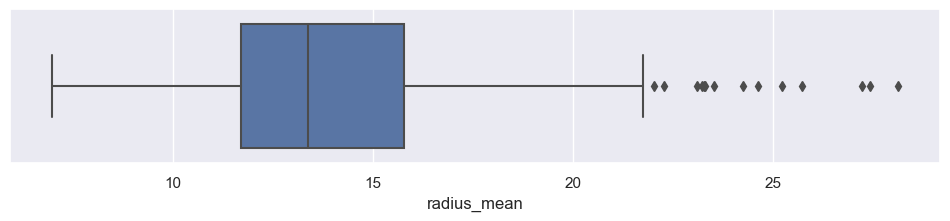

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


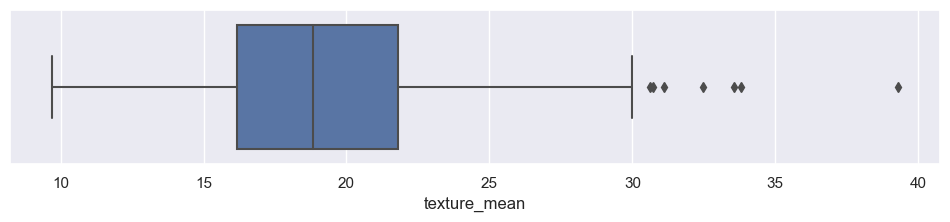

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


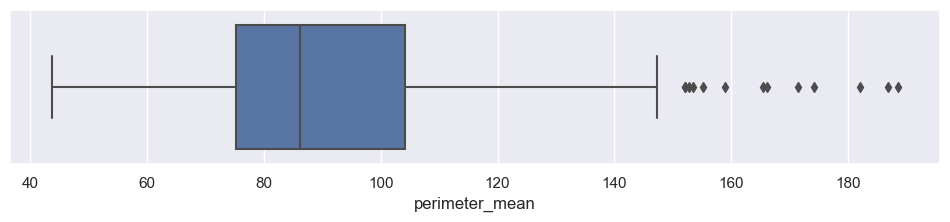

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


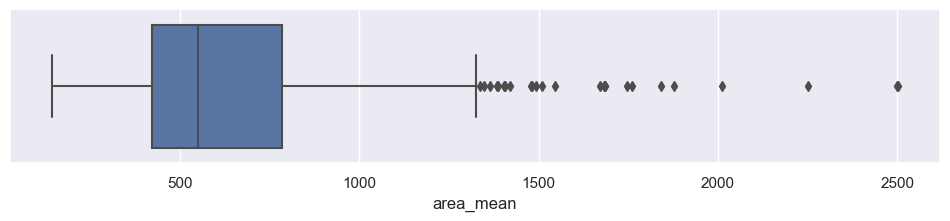

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


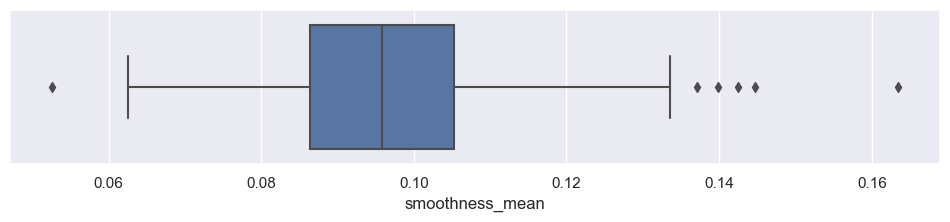

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


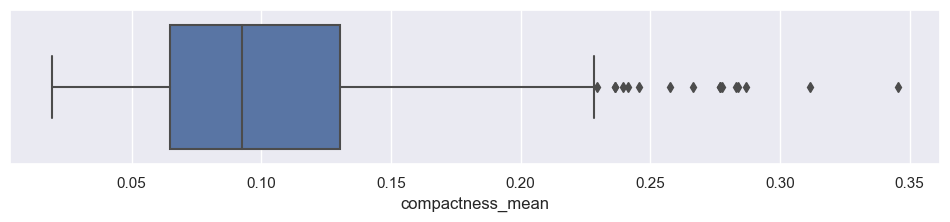

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


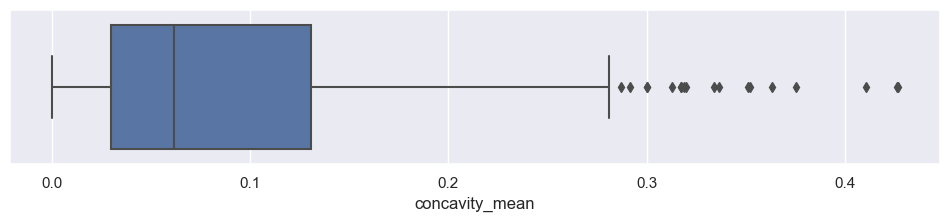

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


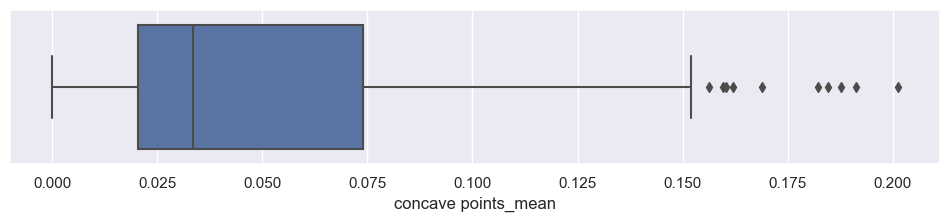

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


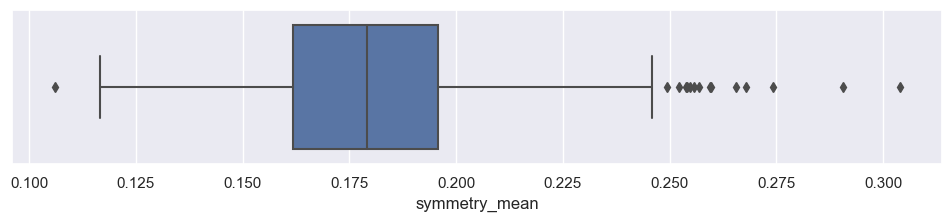

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


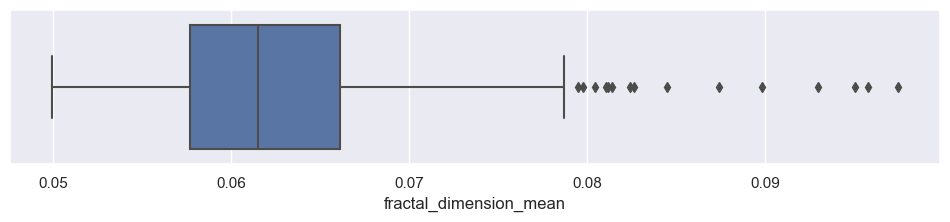

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


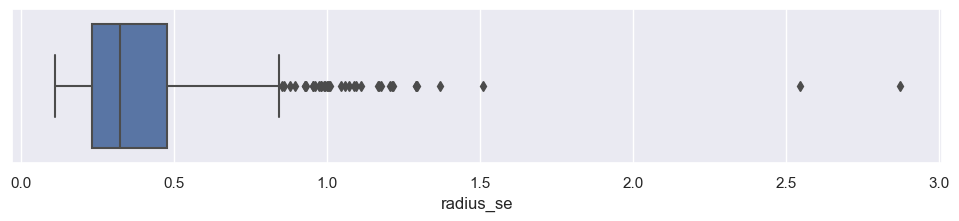

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


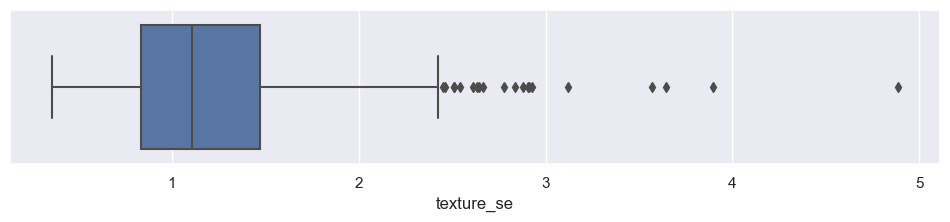

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


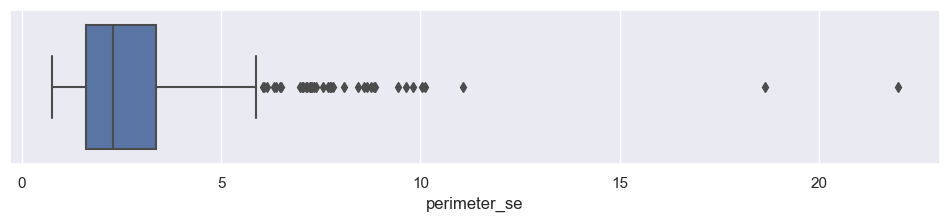

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


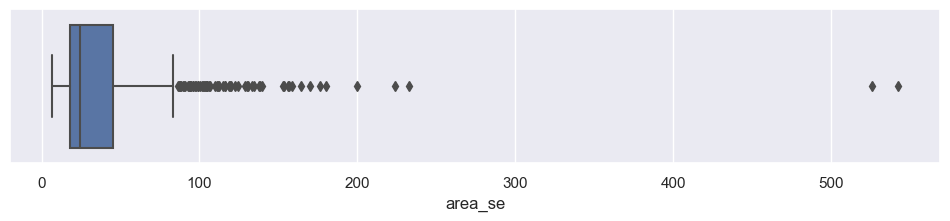

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


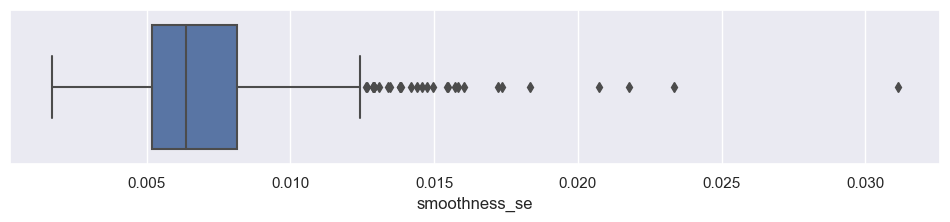

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


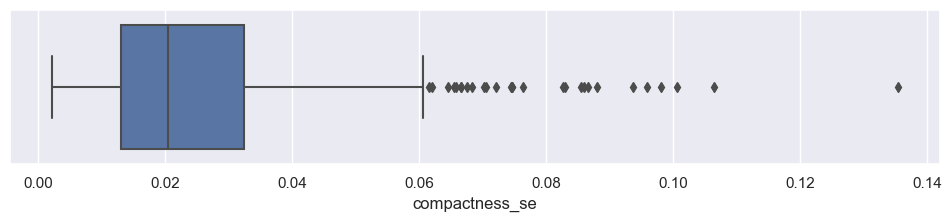

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


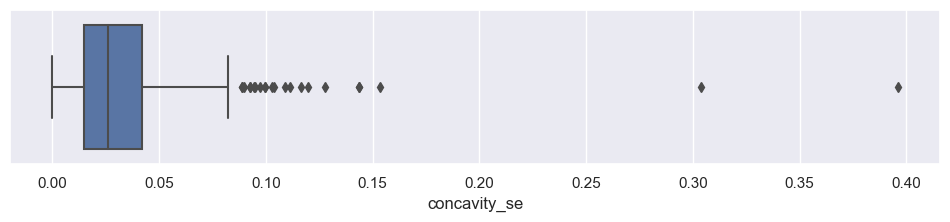

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


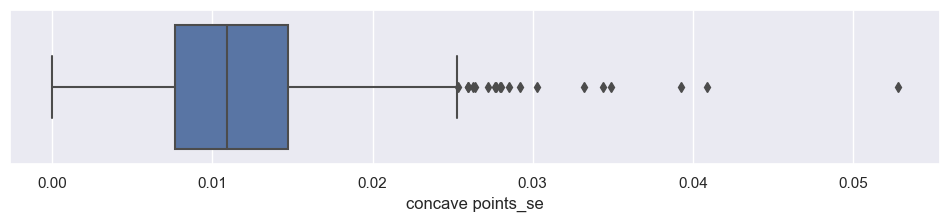

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


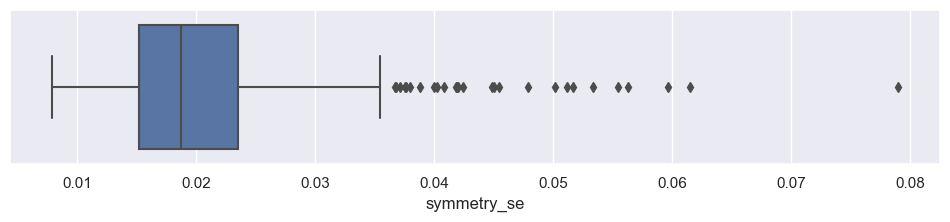

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


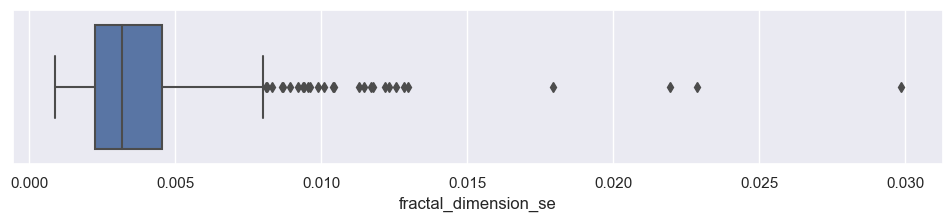

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


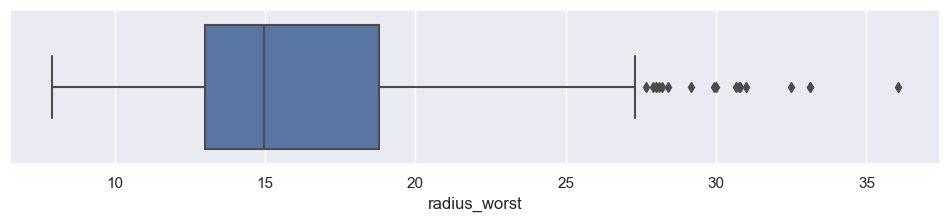

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


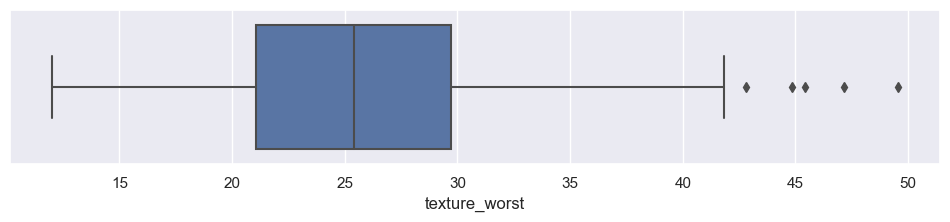

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


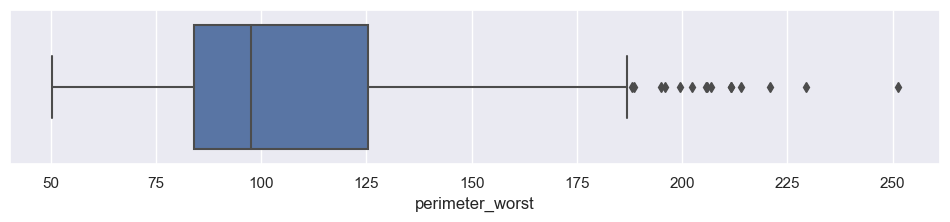

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


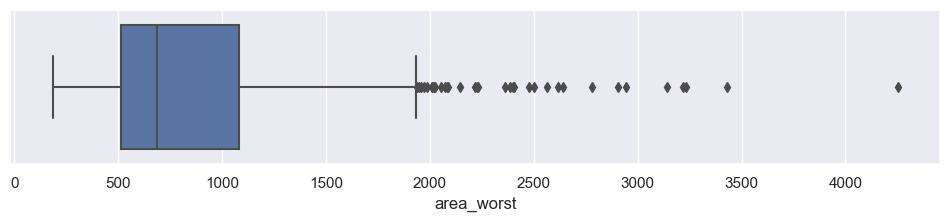

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


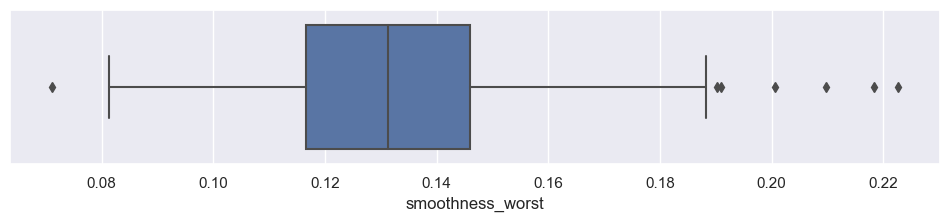

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


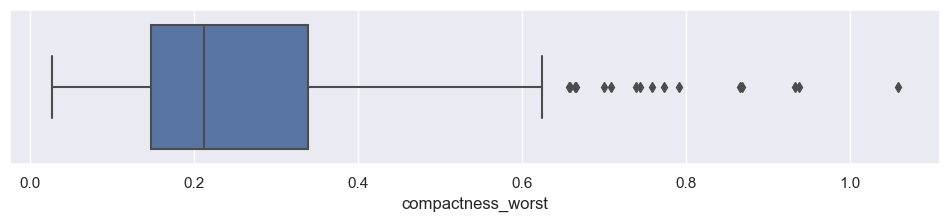

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


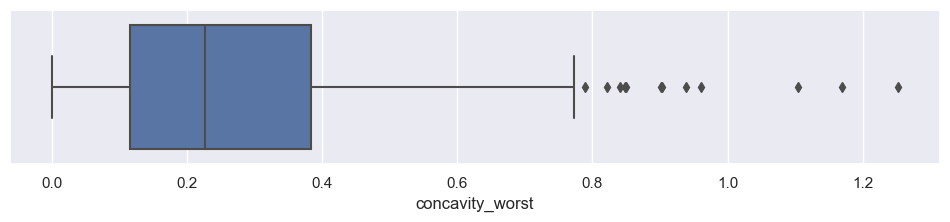

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


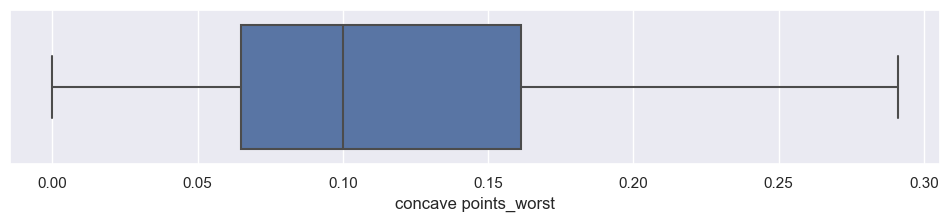

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


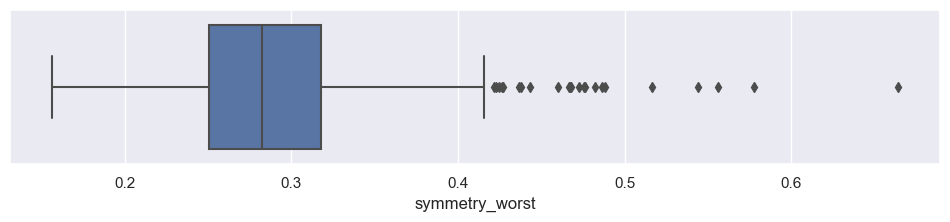

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


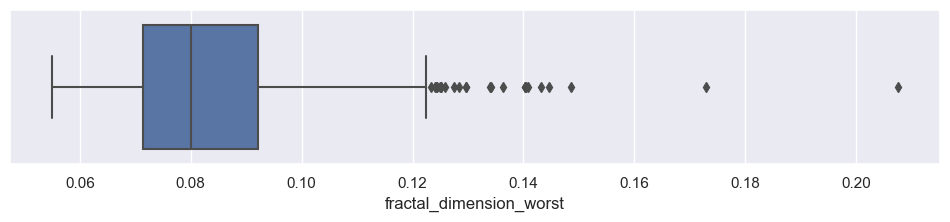

In [12]:
for x in z:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(df[x])
    plt.show()

There are some outlier values in this dataset.

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

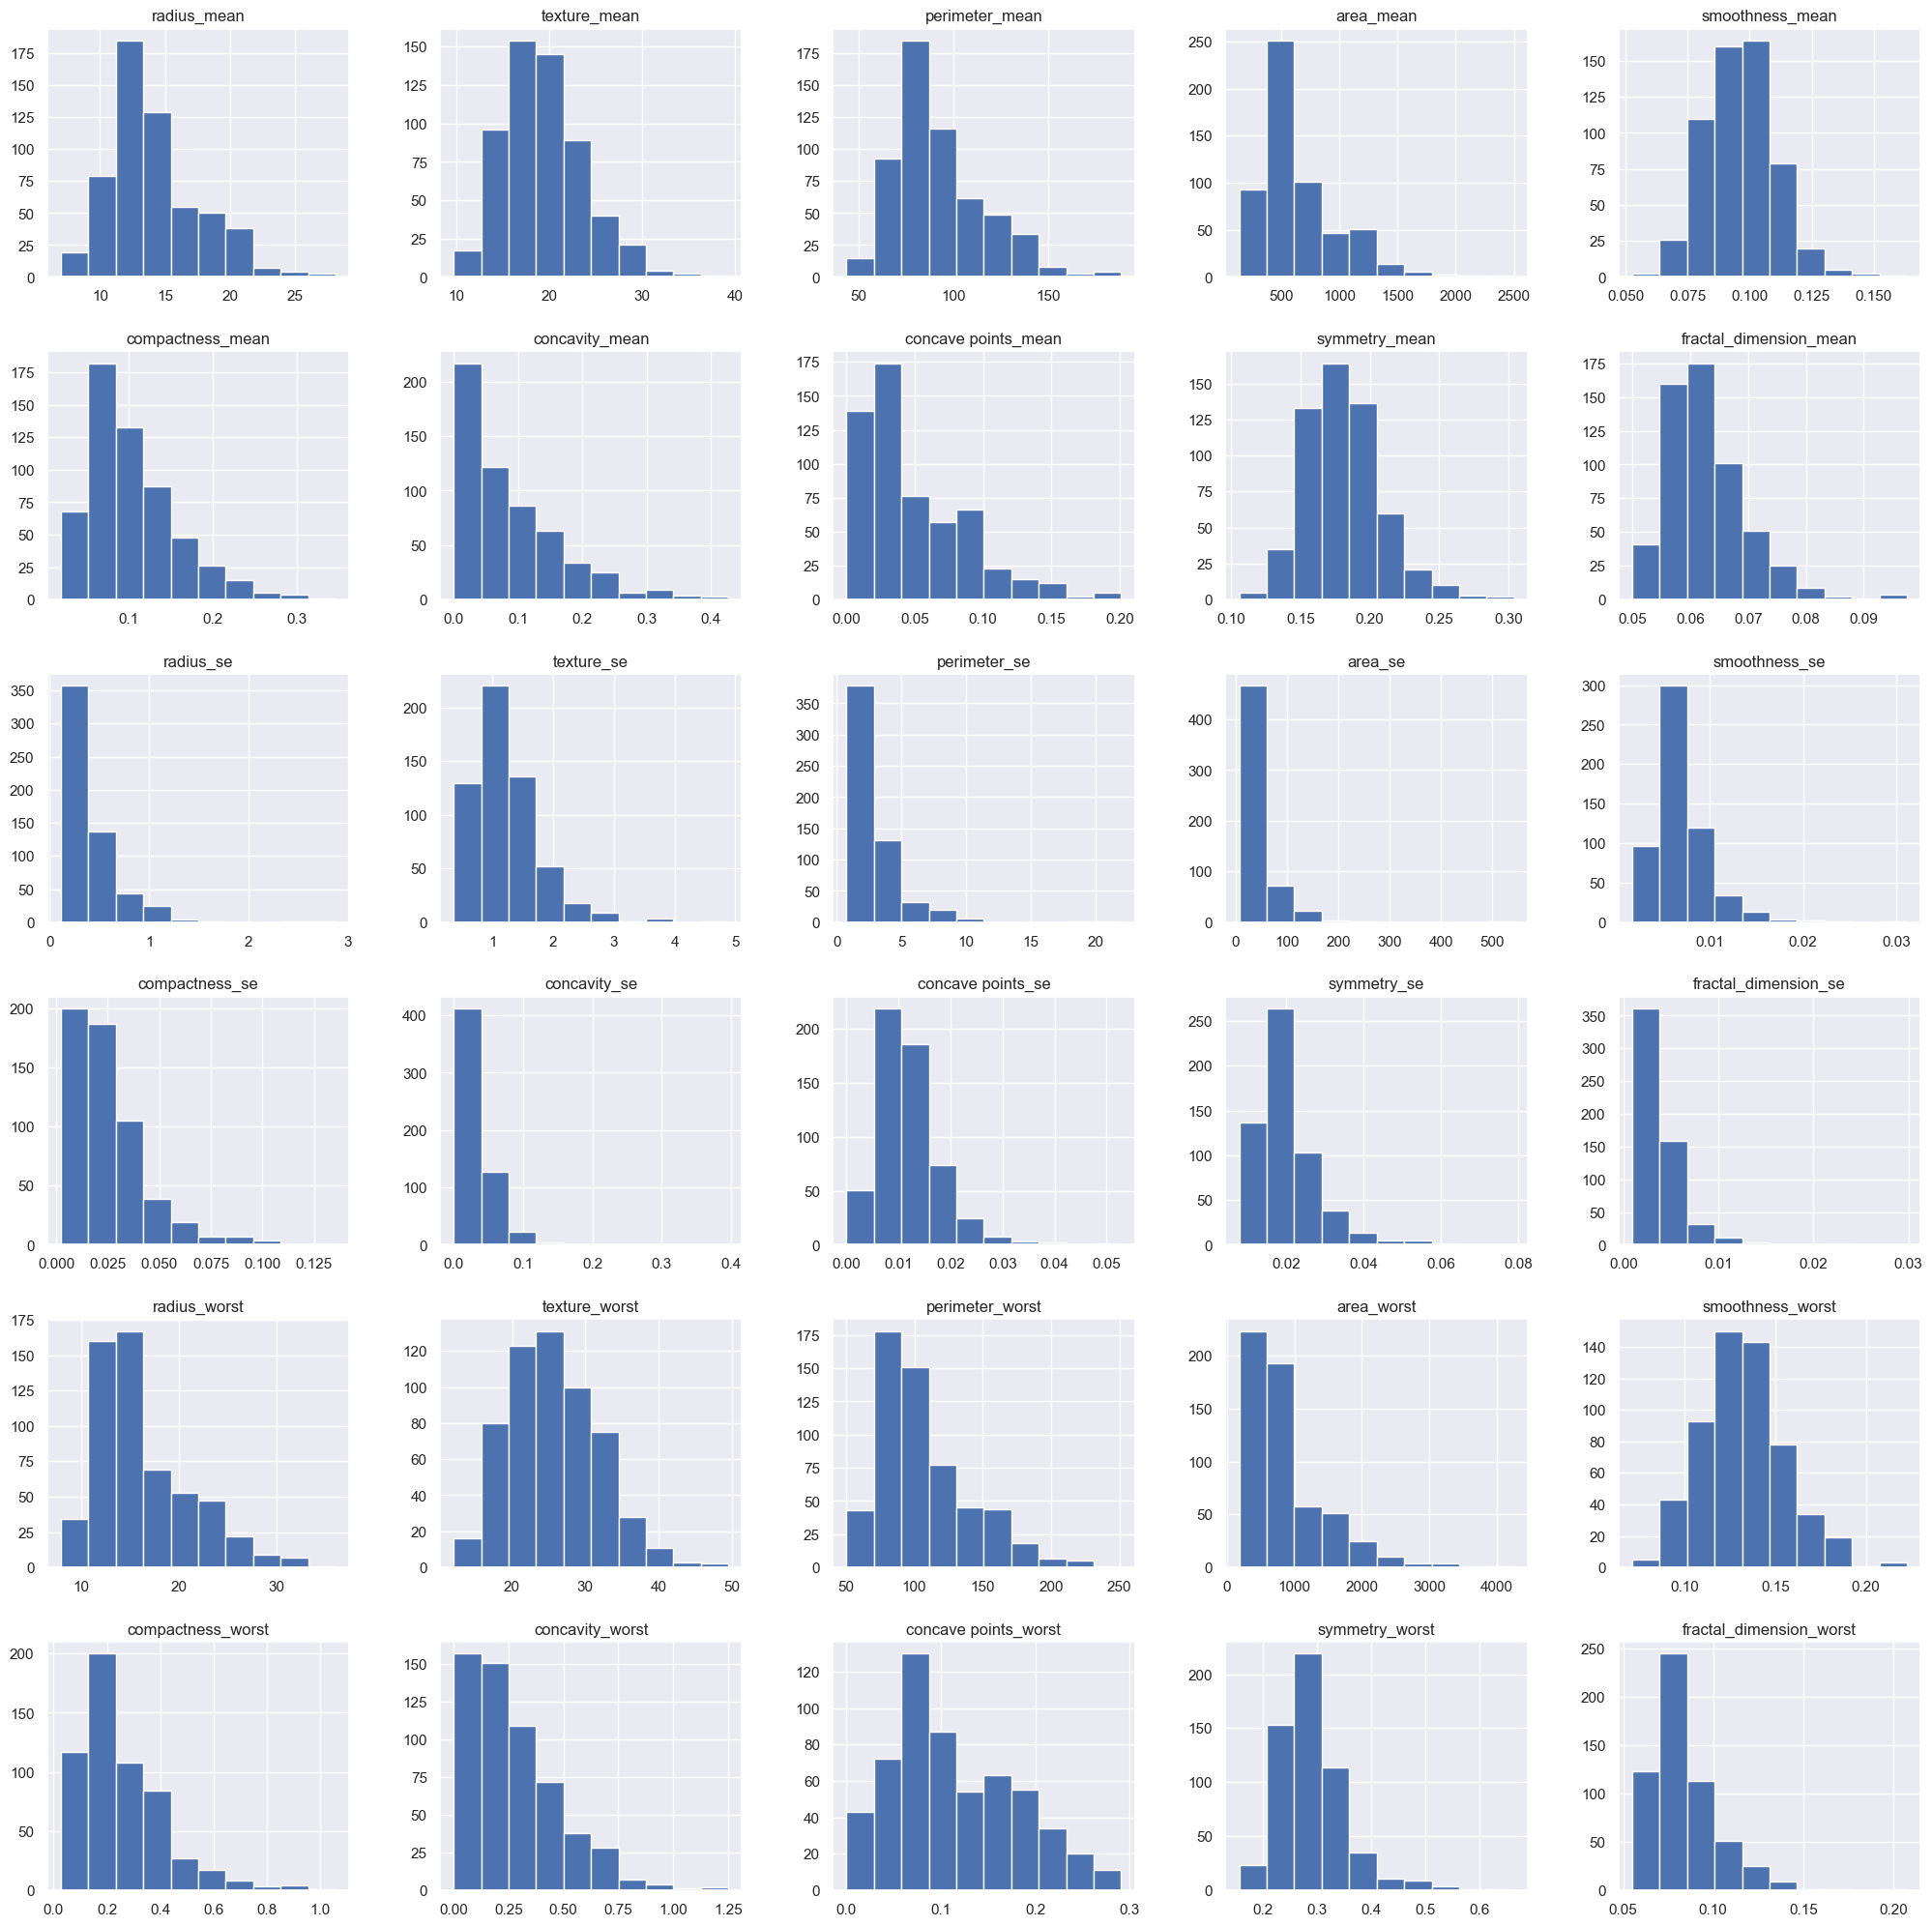

In [13]:
df.hist(figsize = (25, 25))

In [57]:
sns.pairplot(df, size = 20)
plt.show()

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 60000x60000 with 900 Axes>

In [14]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [15]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Now convert catogarical values into the numerical values.

In [16]:
df.replace({'diagnosis' : {'M' : 0, 'B' : 1}}, inplace = True)

In [17]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

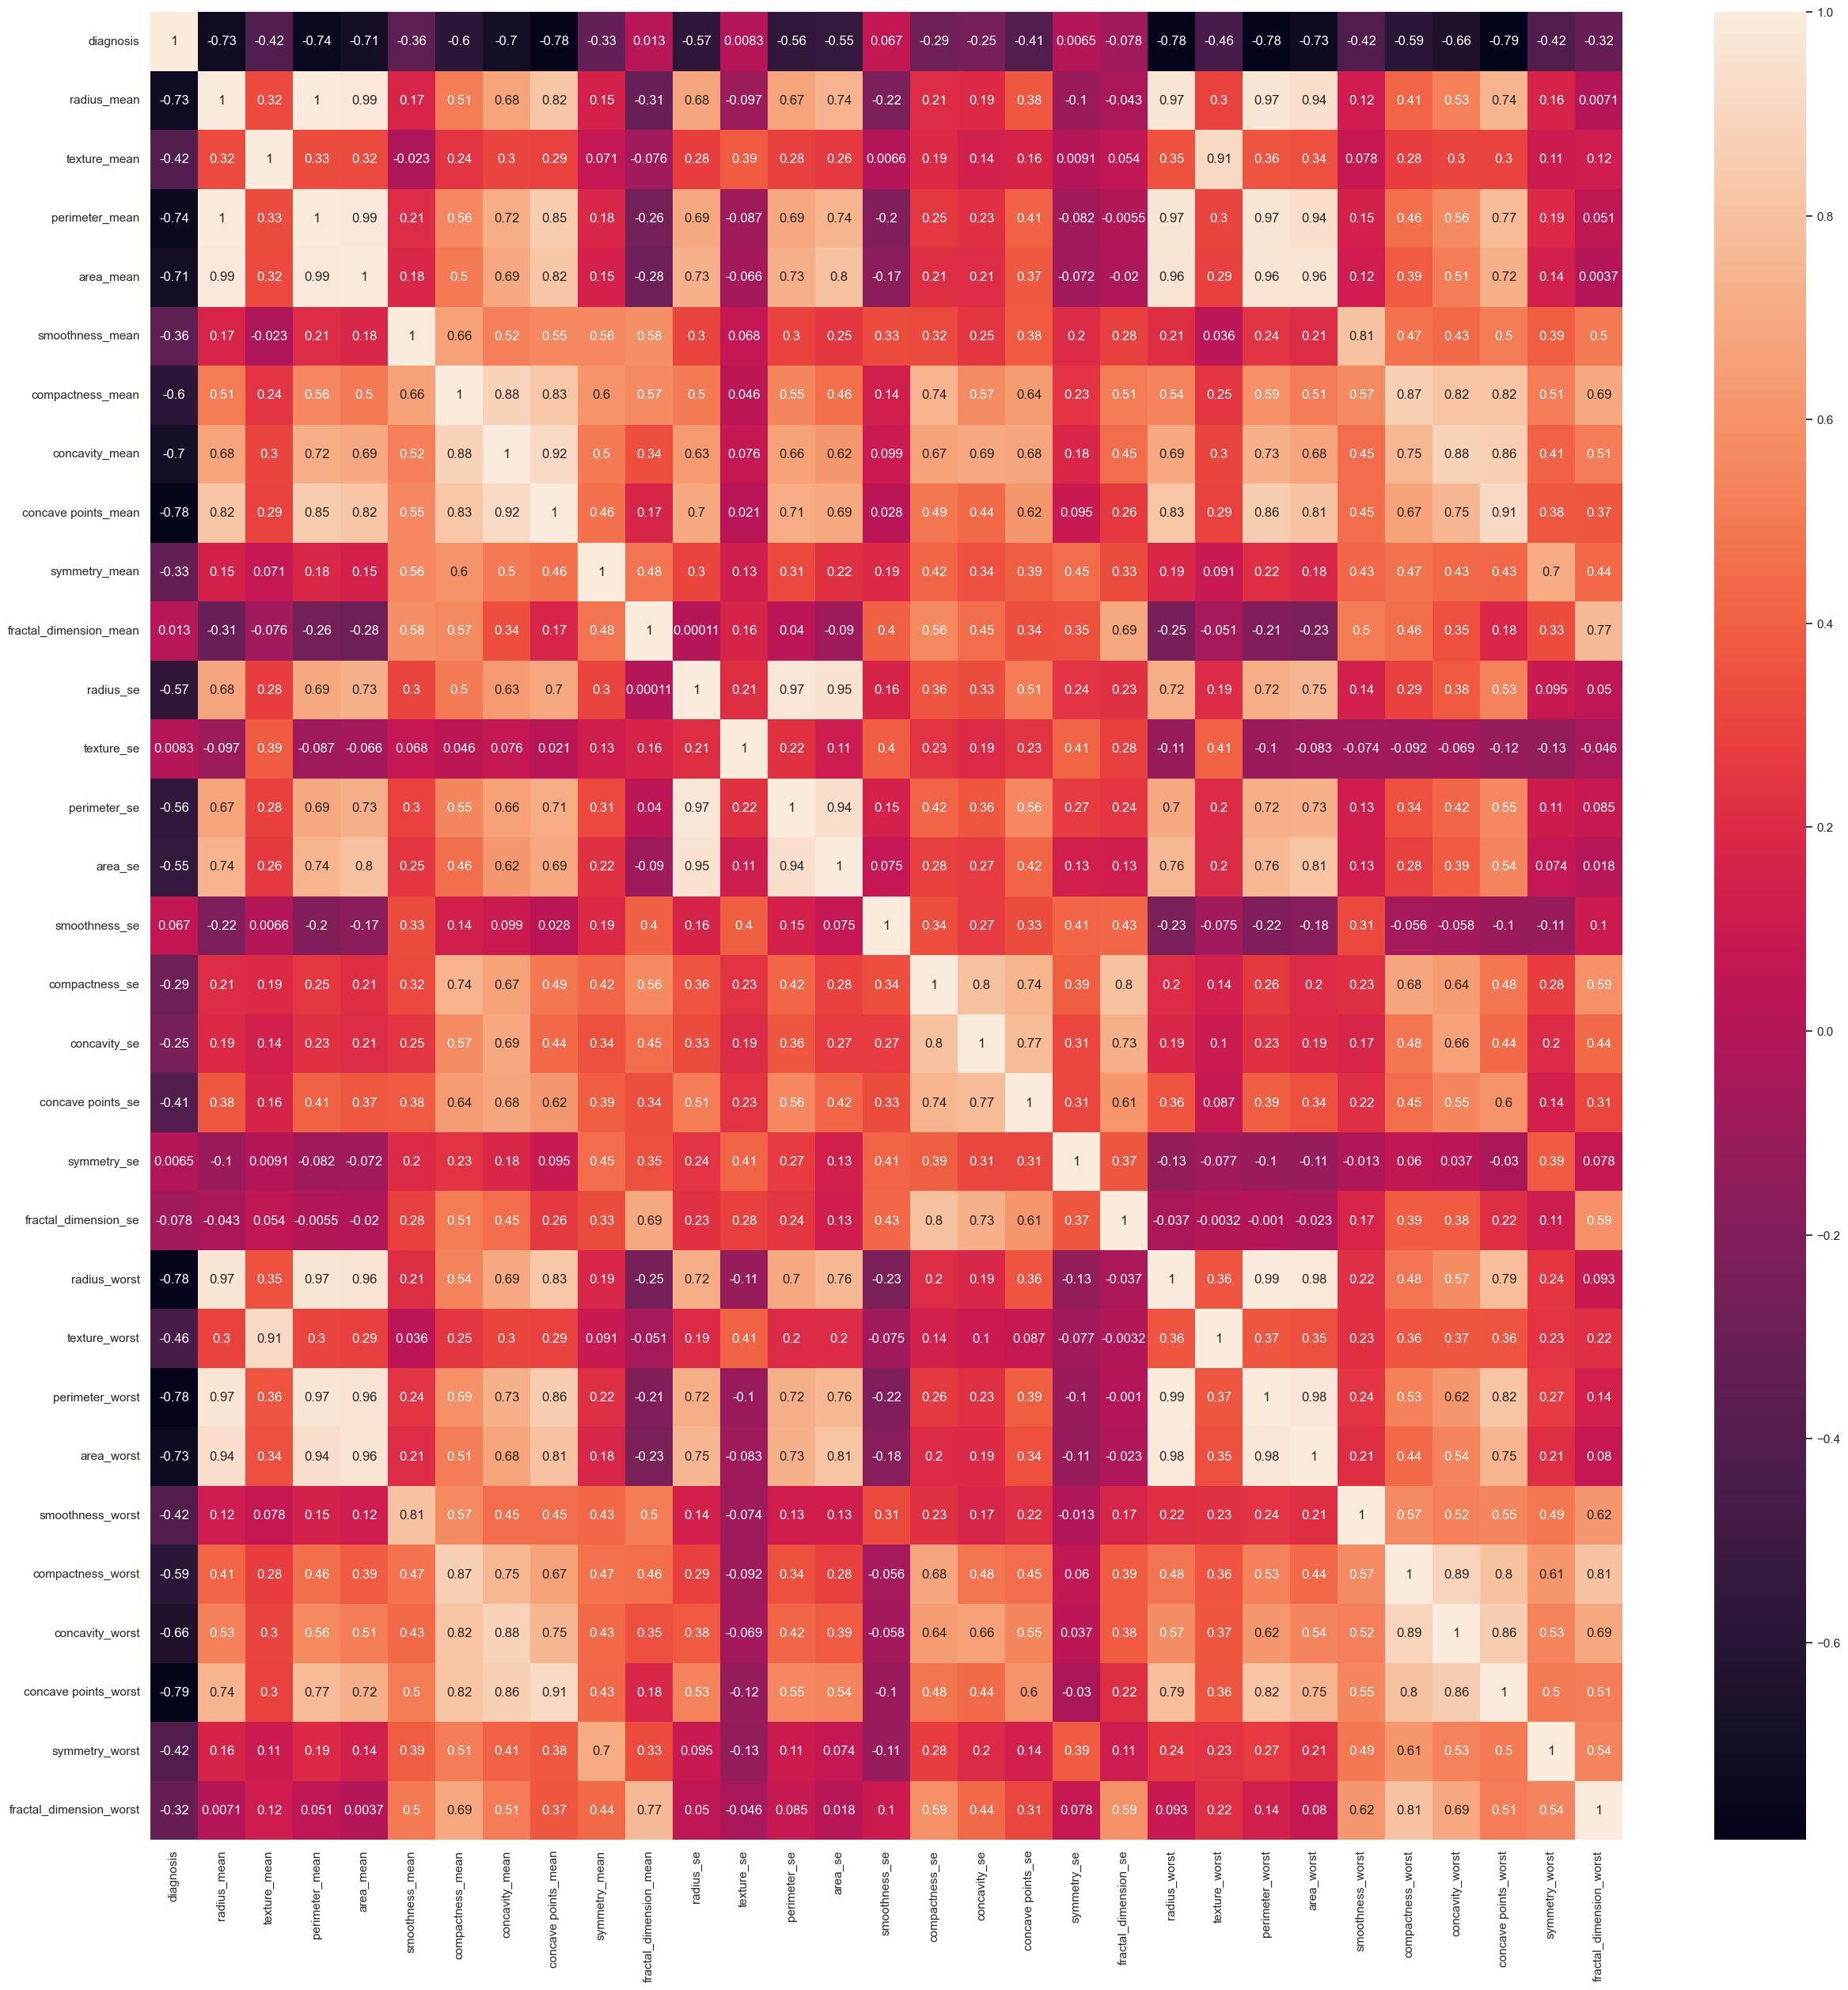

In [37]:
sns.set()
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [18]:
x = df.drop(columns = 'diagnosis', axis = 1)
y = df['diagnosis']

In [19]:
x.sample(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
115,11.93,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,13.67,26.15,87.54,583.0,0.15000,0.2399,0.1503,0.07247,0.2438,0.08541
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,0.1761,0.06540,...,14.42,21.95,99.21,634.3,0.12880,0.3253,0.3439,0.09858,0.3596,0.09166


In [20]:
y.sample(3)

442    1
502    1
407    1
Name: diagnosis, dtype: int64

In [21]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [22]:
x = sc.transform(x)

In [23]:
x = pd.DataFrame(x, columns = ['radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concav points_mean',
'symmetry_mean',
'fractal_dimension_mean',
'radius_se',
'texture_se',
'perimeter_se',
'area_se',
'smoothness_se',
'compactness_se',
'concavity_se',
'concave points_se',
'symmetry_se',
'fractal_dimension_se',
'radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',
'concavity_worst',
'concave points_worst',
'symmetry_worst',
'fractal_dimension_worst'])

In [24]:
x.sample(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concav points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
243,-0.107156,1.042608,-0.141243,-0.184551,-1.133686,-0.687389,-0.525166,-0.657209,-0.140994,-1.206042,...,-0.260756,0.107929,-0.275853,-0.306902,-1.695949,-0.700167,-0.653847,-0.815327,-0.384637,-1.149092
203,-0.090115,1.037954,-0.016848,-0.162367,2.557666,1.373206,0.841192,1.105036,1.604157,1.617825,...,0.606920,2.633636,0.632615,0.478885,3.955374,1.696171,0.923099,1.320051,2.477217,1.366232


In [25]:
x.std()

radius_mean                1.00088
texture_mean               1.00088
perimeter_mean             1.00088
area_mean                  1.00088
smoothness_mean            1.00088
compactness_mean           1.00088
concavity_mean             1.00088
concav points_mean         1.00088
symmetry_mean              1.00088
fractal_dimension_mean     1.00088
radius_se                  1.00088
texture_se                 1.00088
perimeter_se               1.00088
area_se                    1.00088
smoothness_se              1.00088
compactness_se             1.00088
concavity_se               1.00088
concave points_se          1.00088
symmetry_se                1.00088
fractal_dimension_se       1.00088
radius_worst               1.00088
texture_worst              1.00088
perimeter_worst            1.00088
area_worst                 1.00088
smoothness_worst           1.00088
compactness_worst          1.00088
concavity_worst            1.00088
concave points_worst       1.00088
symmetry_worst      

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [32]:
training_data_prediction = lr.predict(x_train)
training_data_prediction

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,